# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 49:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found.")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | rikitea
City not found.
Processing Record 4 of Set 1 | hervey bay
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | tunceli
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | surt
Processing Record 12 of Set 1 | moron
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | huilong
Processing Record 17 of Set 1 | palmer
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | margate
Processing Record 22 of Set 1 | castro
Processing Record 23 of Set 1 | kayerkan
City not found.
Processing Record 24 of Set 1 | faya
Pro

Processing Record 43 of Set 4 | inhambane
Processing Record 44 of Set 4 | krasnyy chikoy
Processing Record 45 of Set 4 | pasni
Processing Record 46 of Set 4 | bad oldesloe
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | vao
Processing Record 49 of Set 4 | kamina
Processing Record 50 of Set 4 | buala
Processing Record 1 of Set 5 | fare
Processing Record 2 of Set 5 | komsomolskiy
Processing Record 3 of Set 5 | conde
Processing Record 4 of Set 5 | perth
Processing Record 5 of Set 5 | rocha
Processing Record 6 of Set 5 | laguna
City not found.
Processing Record 7 of Set 5 | zeya
Processing Record 8 of Set 5 | egvekinot
Processing Record 9 of Set 5 | khatanga
Processing Record 10 of Set 5 | butaritari
Processing Record 11 of Set 5 | atchison
Processing Record 12 of Set 5 | port augusta
Processing Record 13 of Set 5 | bargur
Processing Record 14 of Set 5 | broome
Processing Record 15 of Set 5 | karratha
Processing Record 16 of Set 5 | korla
Processing Record 17 of 

Processing Record 36 of Set 8 | daru
Processing Record 37 of Set 8 | carutapera
City not found.
Processing Record 38 of Set 8 | biloela
Processing Record 39 of Set 8 | mingshui
Processing Record 40 of Set 8 | englehart
Processing Record 41 of Set 8 | mata
Processing Record 42 of Set 8 | karpogory
Processing Record 43 of Set 8 | kerema
Processing Record 44 of Set 8 | puerto escondido
Processing Record 45 of Set 8 | chibombo
City not found.
Processing Record 46 of Set 8 | yarmouth
Processing Record 47 of Set 8 | darasun
Processing Record 48 of Set 8 | hereford
Processing Record 49 of Set 8 | abnub
Processing Record 50 of Set 8 | ornes
Processing Record 1 of Set 9 | navirai
Processing Record 2 of Set 9 | vila
Processing Record 3 of Set 9 | lujan
Processing Record 4 of Set 9 | qasigiannguit
City not found.
Processing Record 5 of Set 9 | amapa
Processing Record 6 of Set 9 | moose factory
City not found.
Processing Record 7 of Set 9 | kijang
Processing Record 8 of Set 9 | nantucket
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
city_data = {"City" : city_two,
             "Cloudiness" : cloudinesses,
             "Country" : countries,
             "Date" : dates,
             "Humidity" : humidities,
             "Lat" : lats,
             "Lng" : lngs,
             "Max Temp" : max_temps,
             "Wind Speed" : wind_speeds}

city_weather_dataframe = pd.DataFrame(city_data)
city_weather_dataframe.to_csv(output_data_file, index = False)

city_weather_dataframe.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [27]:
city_weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kaitangata,4,NZ,1579748531,87,-46.28,169.85,57.13,17.49
1,cidreira,94,BR,1579748251,81,-30.18,-50.21,71.49,12.15
2,rikitea,12,PF,1579748472,75,-23.12,-134.97,79.61,12.46
3,hervey bay,90,US,1579748621,93,33.50,-93.78,37.00,9.17
4,atuona,74,PF,1579748472,70,-9.80,-139.03,81.19,9.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

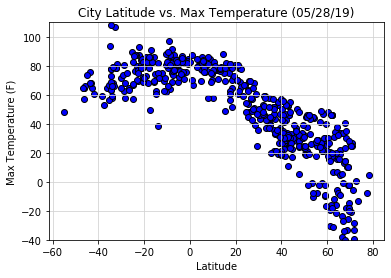

In [28]:
plt.scatter(city_weather_dataframe["Lat"], city_weather_dataframe["Max Temp"], edgecolors="black", facecolors="blue")
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(-40,110)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

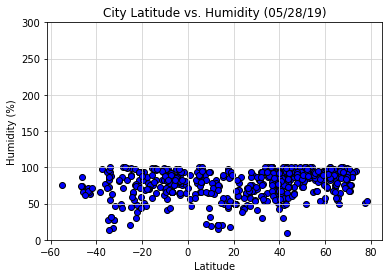

In [29]:
plt.scatter(city_weather_dataframe["Lat"],city_weather_dataframe["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,300)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

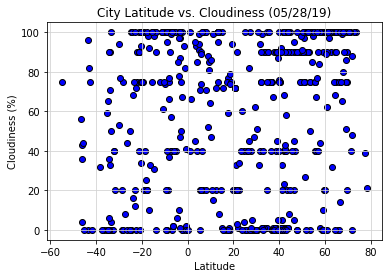

In [30]:
plt.scatter(city_weather_dataframe["Lat"],city_weather_dataframe["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

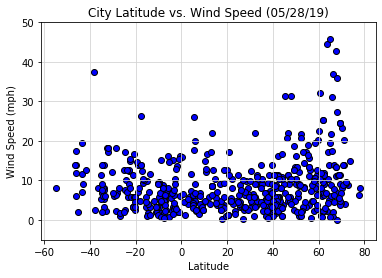

In [31]:
plt.scatter(city_weather_dataframe["Lat"],city_weather_dataframe["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5,50)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("City Latitude vs. Windspeed.png")
plt.show()

## Linear Regression

In [32]:
# OPTIONAL: Create a function to create Linear Regression plots


In [33]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere = city_weather_dataframe.loc[city_weather_dataframe["Lat"] >= 0]
southern_hemisphere = city_weather_dataframe.loc[city_weather_dataframe["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.85
There is a strong negative correlation between Max Temp and Latitude in the N. Hemisphere.


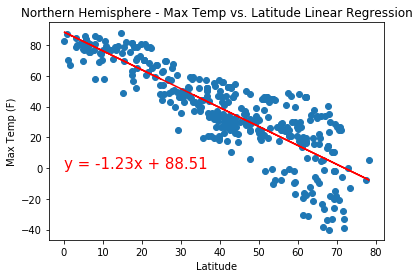

In [34]:
north_lat = northern_hemisphere["Lat"]
north_max = northern_hemisphere["Max Temp"]

print(f"The r-squared is : {round(st.pearsonr(north_lat, north_max)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(0,0),fontsize=15,color="red")

print("There is a strong negative correlation between Max Temp and Latitude in the N. Hemisphere.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.39
There is a moderate correlation between Max Temp and Latitude in the S. Hemisphere.


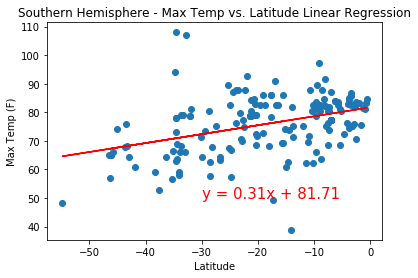

In [35]:
south_lat = southern_hemisphere["Lat"]
south_max = southern_hemisphere["Max Temp"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_max)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

print("There is a moderate correlation between Max Temp and Latitude in the S. Hemisphere.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.36
There is not a moderate correlation between Humidity and Latitude in the N. Hemisphere.


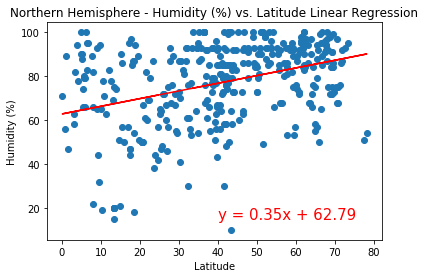

In [36]:
north_humidity = northern_hemisphere["Humidity"]
print(f"The r-squared is : {round(st.pearsonr(north_lat, north_humidity)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(40,15),fontsize=15,color="red")

print("There is not a moderate correlation between Humidity and Latitude in the N. Hemisphere.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.2
There is not a moderate correlation between Humidity and Latitude in the S. Hemisphere.


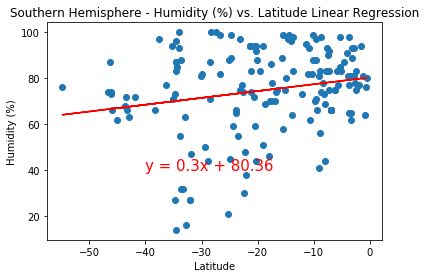

In [37]:
south_humidity = southern_hemisphere["Humidity"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_humidity)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(-40,40),fontsize=15,color="red")

print("There is not a moderate correlation between Humidity and Latitude in the S. Hemisphere.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.25
There is not a strong correlation between Cloudiness and Latitude in the N. Hemisphere.


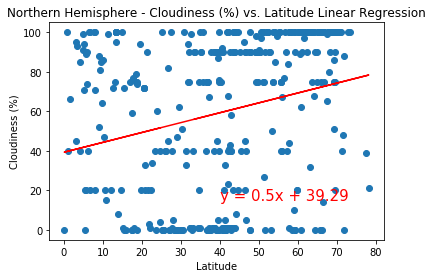

In [38]:
north_cloudiness = northern_hemisphere["Cloudiness"]

print(f"The r-squared is : {round(st.pearsonr(north_lat, north_cloudiness)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(40,15),fontsize=15,color="red")

print("There is not a strong correlation between Cloudiness and Latitude in the N. Hemisphere.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.29
There is not a strong correlation between Cloudiness and Latitude in the S. Hemisphere.


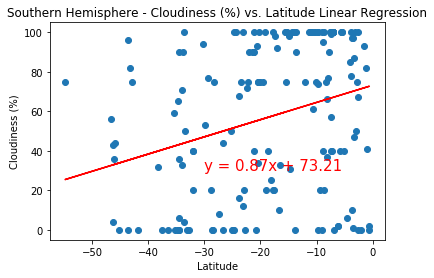

In [39]:
south_cloudiness = southern_hemisphere["Cloudiness"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_cloudiness)[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

print("There is not a strong correlation between Cloudiness and Latitude in the S. Hemisphere.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.28
There is not a strong correlation between Wind Speed and Latitude in the N. Hemisphere.


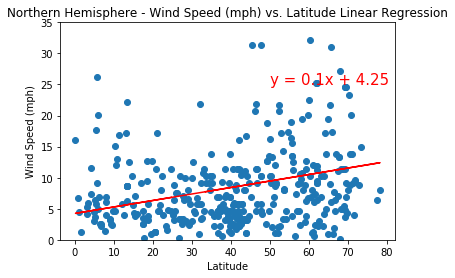

In [40]:
north_wind = northern_hemisphere["Wind Speed"]

print(f"The r-squared is : {round(st.pearsonr(north_lat, north_wind)[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

plt.ylim(0, 35)

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(50,25),fontsize=15,color="red")

print("There is not a strong correlation between Wind Speed and Latitude in the N. Hemisphere.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.28
There is not a strong correlation between Wind Speed and Latitude in the S. Hemisphere.


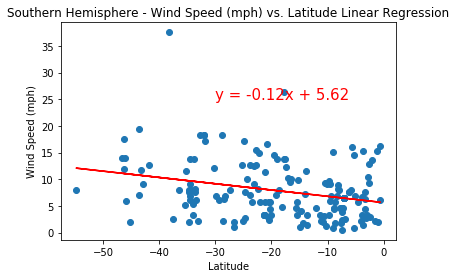

In [41]:
south_wind = southern_hemisphere["Wind Speed"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_wind)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(-30,25),fontsize=15,color="red")

print("There is not a strong correlation between Wind Speed and Latitude in the S. Hemisphere.")